Digital audio basics
Audio representation in computers

In [1]:
# import libraries for manipulating arrays and plotting graphs
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


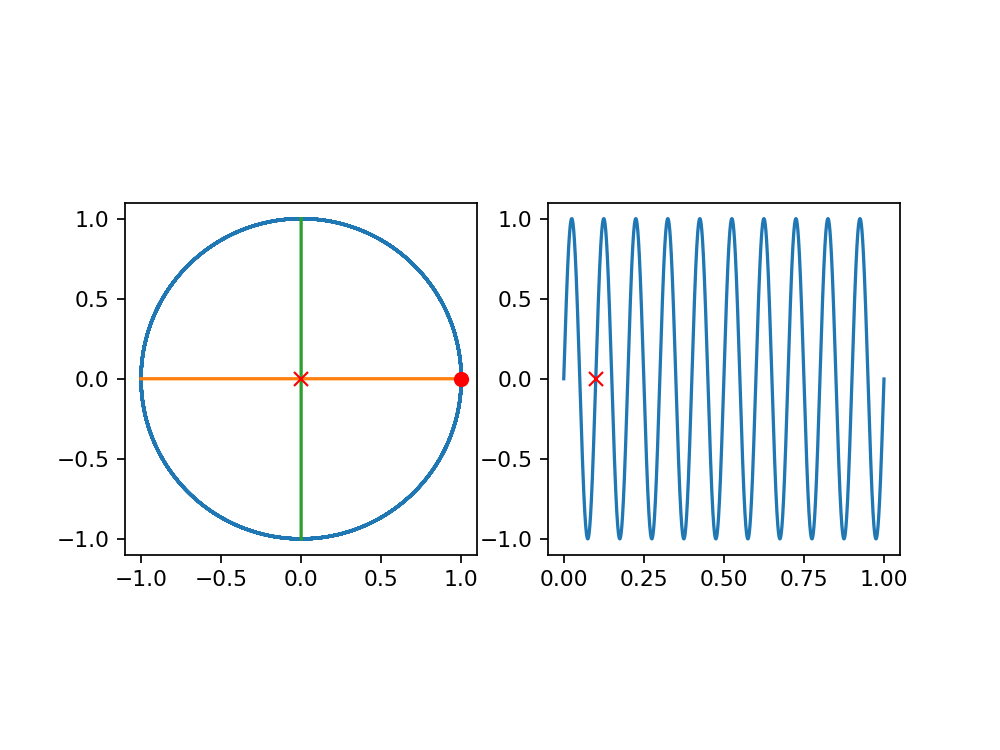

interactive(children=(FloatSlider(value=0.0, description='t_v', max=1.0, step=0.001), Output()), _dom_classes=…

<function __main__.change_time_value(t_v=0.0)>

In [2]:
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sr = 44100
t = np.arange( sr )/sr
t_value = 0.0
# set frequency
f = 10
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# plot sinusoidal in phase and time space
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_aspect('equal', adjustable='box')
plt.plot( np.cos( 2*np.pi*f*t ) , s )
plt.plot( 1-2*t , np.zeros( t.size ) )
plt.plot( np.zeros( t.size ) , 1-2*t )
# plt.plot( np.cos( 2*np.pi*f*t_value ) , np.sin( 2*np.pi*f*t_value ) , 'rx' )
unit_plot, = ax1.plot( np.cos( 2*np.pi*f*t_value ) , np.sin( 2*np.pi*f*t_value ) , 'ro' )
sine_plot, = ax1.plot( 0 , np.sin( 2*np.pi*f*t_value ) , 'rx' )
ax2 = fig.add_subplot(122)
plt.plot( t , s )
# plt.plot( t_value , np.sin( 2*np.pi*f*t_value ) , 'rx' )
time_plot, = ax2.plot( t_value , np.sin( 2*np.pi*f*t_value ) , 'rx' )
ax2.set_aspect(1.0/ax2.get_data_ratio(), adjustable='box')

def change_time_value(t_v=0.0):
    unit_plot.set_ydata( np.sin( 2*np.pi*f*t_v ) )
    unit_plot.set_xdata( np.cos( 2*np.pi*f*t_v ) )
    sine_plot.set_ydata( np.sin( 2*np.pi*f*t_v ) )
    time_plot.set_ydata( np.sin( 2*np.pi*f*t_v ) )
    time_plot.set_xdata( t_v )
    print('t_value 1 : ' + str(t_v))
    # fig.canvas.draw()
    fig.show()
    return t_v

# w = widgets.IntSlider(min=0, max=50, step=1, value=10)
# display(w)
interact(change_time_value, t_v=widgets.FloatSlider(min=0.0, max=1.0, step=0.001, value=0.0))

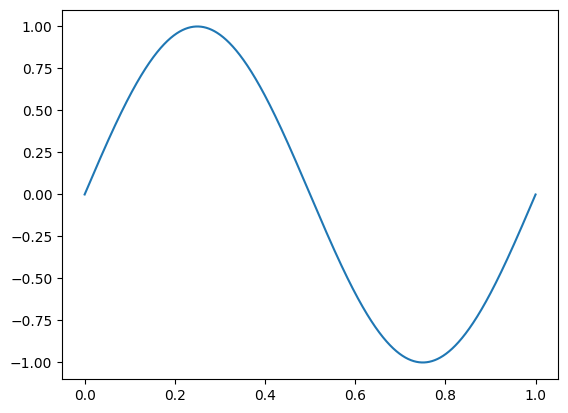

In [20]:
# initialise 'time' array
t = np.arange(44100)/44100
# make a sinusoidal
s = np.sin( 2*np.pi*t )
# plot it
plt.plot( t, s )

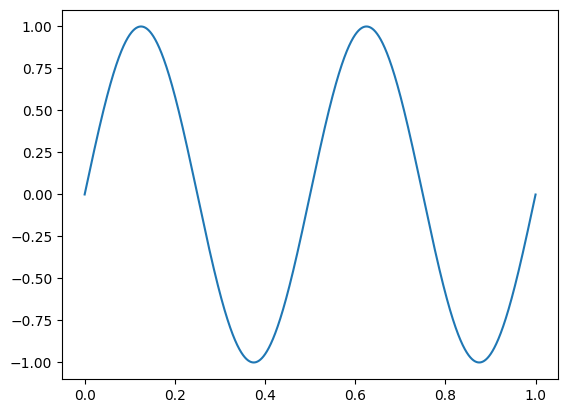

In [19]:
# change frequency, e.g. 2
# set frequency
f = 2
# make sinusoidal with new frequency
s = np.sin( 2*np.pi*f*t )
# and plot it
plt.plot( t, s )

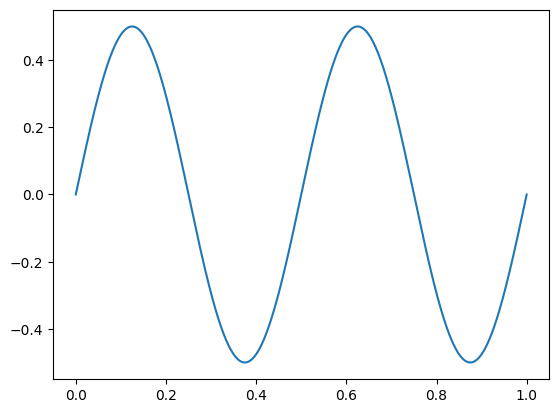

In [22]:
# change amplitude, e.g. 0.5
# set frequency
a = 0.5
f = 2
# make sinusoidal with new frequency
s = a*np.sin( 2*np.pi*f*t )
# and plot it
plt.plot( t, s )

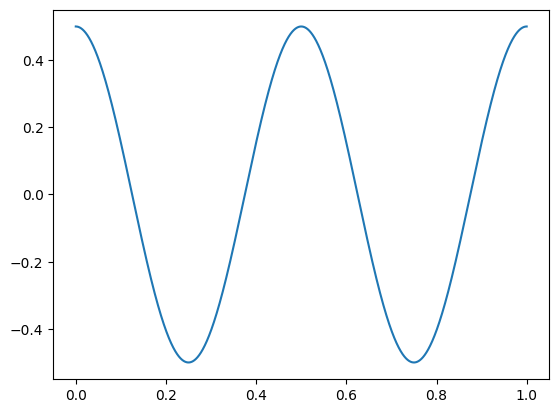

In [24]:
# change phase, e.g. pi/2
# set frequency
a = 0.5
f = 2
p = np.pi/2
# make sinusoidal with new frequency
s = a*np.sin( 2*np.pi*f*t + p )
# and plot it
plt.plot( t, s )

In [7]:
%matplotlib inline
import scipy.io.wavfile as wf

# load an audio file
sr_a, a = wf.read('../audio_files/ah.wav')
# check its shape and sample rate
print('shape of file: ' + str(a.shape) + ' - sample rate: ' + str(sr_a))

shape of file: (32654, 2) - sample rate: 22050


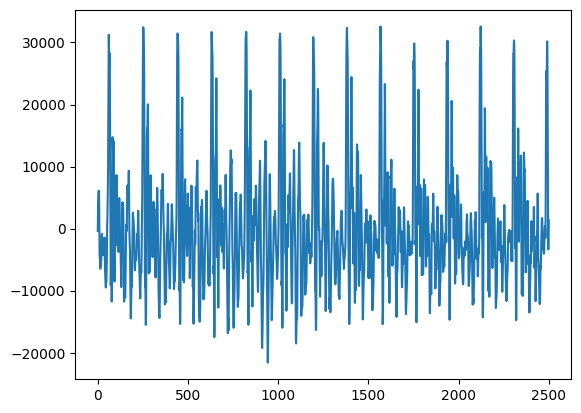

In [8]:
# two columns correspond to left and right channels
# get a small monophonic (left channel) part of it
p = a[15000:17500, 0] # zero-th column means left channel
# and plot it
plt.plot( np.arange( p.size ) , p )

In [9]:
# notice the values:
print('some values of the file: ' + str(p[:100]))
# they are "large" integers, why?
# because quantization - analyzed later...

some values of the file: [  -394   2272   4374   5572   5863   5923   6105   5500   3273   -369
  -3719  -4811  -4850  -5725  -6456  -6361  -5834  -5087  -4975  -5190
  -4348  -2618  -1033   -852  -2421  -3903  -4202  -4183  -4114  -3717
  -3408  -3513  -3812  -4218  -4289  -3355  -1943  -1435  -2655  -4905
  -6592  -7349  -7888  -8589  -9412  -9503  -8848  -8763  -8596  -7511
  -5772  -2701    327   1431   2605   4754   6531   8873  13689  21089
  28236  31248  29881  27190  26208  27586  28251  25042  18345  10137
   1780  -5434  -9114  -7495  -3915  -3837  -7778 -11750 -10932  -3698
   5818  12493  14739  14107  13008  11646  10412  11669  14099  13542
   8528    278  -6779  -8530  -6141  -2879  -1141  -1620  -2539  -2745]


In [10]:
# how can we scale a 16bit-range array (16-bit audio file) to a range of [-1, 1] (as shown in audacity)
# p is a 16-bit array
i16range = np.iinfo(np.int16)
print(repr(i16range))
print(i16range.min)
print(i16range.max)

p_audacity = np.interp( p[:100], (i16range.min, i16range.max), (-1,1) )
print(p_audacity)

iinfo(min=-32768, max=32767, dtype=int16)
-32768
32767
[-0.01200885  0.06935225  0.13350118  0.1700618   0.17894255  0.18077363
  0.18632792  0.1678645   0.09990082 -0.0112459  -0.11348135 -0.14680705
 -0.14799725 -0.17470054 -0.19700923 -0.19411002 -0.17802701 -0.15523003
 -0.15181201 -0.15837339 -0.1326772  -0.07988098 -0.03150988 -0.02598611
 -0.07386893 -0.11909667 -0.12822156 -0.12764172 -0.12553597 -0.11342031
 -0.10399023 -0.10719463 -0.11631952 -0.12870985 -0.13087663 -0.10237278
 -0.0592813  -0.04377813 -0.08101015 -0.14967575 -0.20115969 -0.22426184
 -0.24071107 -0.26210422 -0.28722057 -0.28999771 -0.27000839 -0.26741436
 -0.26231785 -0.22920577 -0.17613489 -0.08241398  0.00999466  0.04368658
  0.07951476  0.14509804  0.1993286   0.27080186  0.41777676  0.64361028
  0.86172274  0.95364309  0.91192493  0.82980087  0.79983215  0.84188602
  0.86218051  0.76424811  0.55986877  0.30937667  0.05433738 -0.16581979
 -0.27812619 -0.22871748 -0.11946288 -0.11708248 -0.23735409 -0.35857

In [11]:
# before that, let's check out a "smoother" waveform
import sounddevice as sd
sr_w, w = wf.read('../audio_files/whistling.wav')
print('shape of file: ' + str(w.shape) + ' - sample rate: ' + str(sr_w))
sd.play(w,sr_w)

shape of file: (45774, 2) - sample rate: 22050


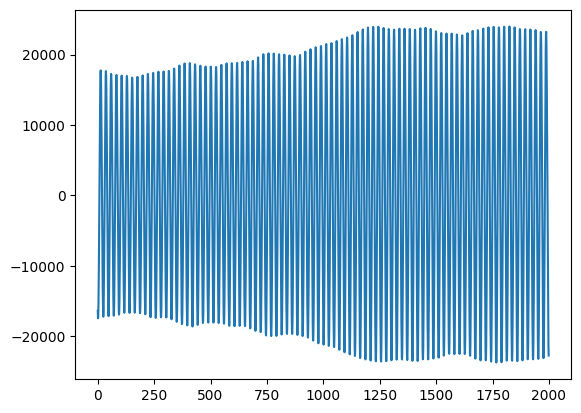

In [12]:
# get a part of it
p = w[15000:17000, 0]
# and plot it
plt.plot( np.arange( p.size ) , p )

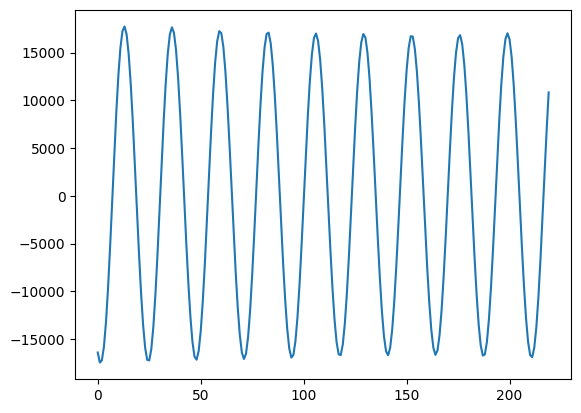

In [13]:
# let's zoom in a bit more
# get a part of it
p = w[15000:15220, 0]
# and plot it
plt.plot( np.arange( p.size ) , p )

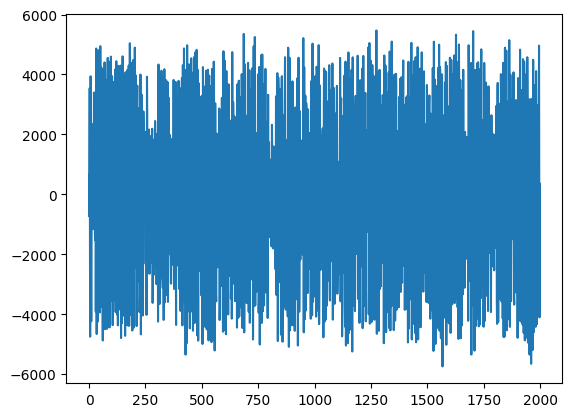

In [14]:
# now, let's get a rough waveform
sr_w, w = wf.read('../audio_files/noise.wav')

p = w[15000:17000, 0]
# and plot it
plt.plot( np.arange( p.size ) , p )

In [15]:
# let's listen to some audio
import sounddevice as sd
# set frequency
f = 440
a = 1
# make sinusoidal with new frequency
s = a*np.sin( 2*np.pi*f*t )
# and play it
sd.play( s , 44100 )

In [16]:
# we can also make a wav file out of it
import scipy.io.wavfile as wf
wf.write('../audio_files/test1.wav', 44100, s)
# you can open saved wav file in Audacity to check it out

In [17]:
# we can play the file
sd.play( s , sr )

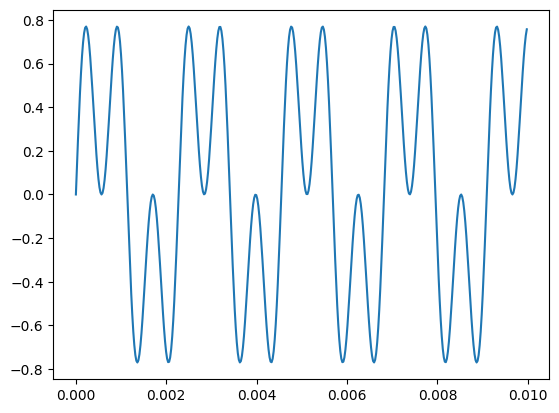

In [26]:
# add harmonics
f1 = 440
a1 = 0.5
f2 = 3*f1
a2 = 0.5
s1 = a1*np.sin( 2*np.pi*f1*t )
s2 = a2*np.sin( 2*np.pi*f2*t )
# plot them as they would sound together, i.e., plot sum
s = s1 + s2
# for clarity, plot the first 1/10 of a second
plt.plot( t[:441] , s[:441] )
sd.play( s , 44100 )

## Exercise
Using jupyter notebook or Google colab (using the code that enables audio playback on the browser):

1. Create a sinusoidal waveform with 44100Hz sample rate, with frequency 100 and amplitude 1.0.
2. Create another waveform that includes the first two harmonics with linear amplitude decay, i.e., with frequences 2*100 and 3*100 and amplitudes 1/2 and 1/3.
3. Create another waveform that comprises the first 6 harmonics with quadratic decay, i.e., frequencies that are multiples from 2 to 6 and amplitudes from 1/4 to 1/36. You can use a for loop for that.
4. Play the audio and plot the waveform of all three waveforms. Which of those sounds more "harsh" to you?